In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
width 
length 
height


x1 = np.random.rand(-width/2 , width/2)
y1 = np.random.rand(0 , length)


x2 = np.random.rand(-width/2 , width/2)
y2 = np.random.rand(0 , length)

L = np.sqrt((x1-y1)**2 + (x2-y2)**2 + height**2)


cos = h/L

v_signal \approx 2/3 c 

t_signal = (np.sqrt(x1**2 + y1**2) - np.sqrt(x2**2 + y2**2))/v_signal

t = L/v_mu  + t_signal + t_0

prob of event = cos**2

[0.99446013 0.99446013 0.99446013 ... 0.99446013 0.99446013 0.99446013]


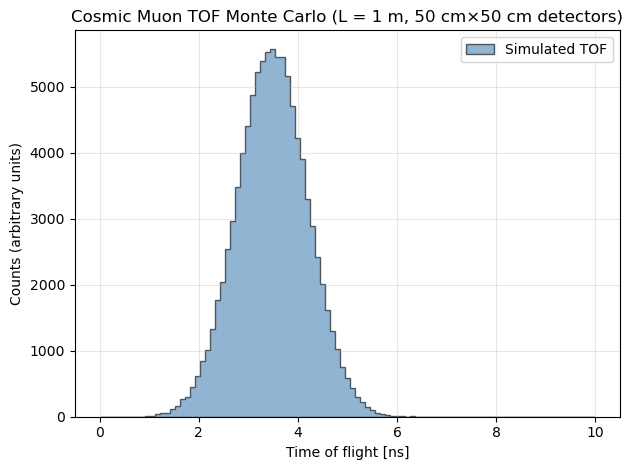

Generated muons: 1000000
Accepted through both planes: 99276 (9.93 % acceptance)
Mean TOF = 3.474 ns, σ = 0.714 ns


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physical constants
# -----------------------------
c = 299792458.0         # speed of light [m/s]
m_mu = 105.7e6           # muon mass [eV]
L = 1.0                  # distance between detectors [m]
det_size = 0.5           # detector width [m]
half_size = det_size / 2

# -----------------------------
# Simulation settings
# -----------------------------
N = 1_000_000            # number of thrown muons
time_resolution = 0.5e-9 # Gaussian timing smearing per detector [s]

# -----------------------------
# Generate muon directions
# Zenith-angle distribution: I(theta) ∝ cos^2(theta)
# CDF inversion: u = cos^3(theta)
# -----------------------------
u = np.random.rand(N)
theta = np.arccos(u ** (1 / 3))
phi = 2 * np.pi * np.random.rand(N)

# -----------------------------
# Generate momentum spectrum ~ p^-2.7 between 1 and 100 GeV
# -----------------------------
pmin, pmax = 1e9, 1e9  # eV/c
r = np.random.rand(N)
p = ((pmax**-1.7 - pmin**-1.7) * r + pmin**-1.7) ** (-1 / 1.7)

# -----------------------------
# Compute beta = v/c
# -----------------------------
E = np.sqrt(p**2 + m_mu**2)
beta = p / E
print(beta)
# -----------------------------
# Starting positions on top plane
# -----------------------------
x_top = (np.random.rand(N) - 0.5) * det_size
y_top = (np.random.rand(N) - 0.5) * det_size

# Project to bottom plane
dx = L * np.tan(theta) * np.cos(phi)
dy = L * np.tan(theta) * np.sin(phi)
x_bot = x_top + dx
y_bot = y_top + dy

# -----------------------------
# Geometric acceptance: must hit both planes
# -----------------------------
mask = (
    (np.abs(x_bot) < half_size) &
    (np.abs(y_bot) < half_size)
)
theta = theta[mask]
beta = beta[mask]

# -----------------------------
# True TOF (no smearing)
# -----------------------------
tof_true = L / (beta * c * np.cos(theta))   # [s]

# -----------------------------
# Add detector timing resolution (independent smearing for top & bottom)
# -----------------------------
smear_top = np.random.normal(0, time_resolution, size=len(tof_true))
smear_bot = np.random.normal(0, time_resolution, size=len(tof_true))
tof_meas = tof_true + smear_bot - smear_top

# -----------------------------
# Convert to nanoseconds
# -----------------------------
tof_ns = tof_meas * 1e9

# -----------------------------
# Plot histogram
# -----------------------------
bins = np.linspace(0, 10, 100)
plt.hist(tof_ns, bins=bins, histtype='stepfilled', alpha=0.6,
         color='steelblue', edgecolor='black', label='Simulated TOF')
plt.xlabel("Time of flight [ns]")
plt.ylabel("Counts (arbitrary units)")
plt.title("Cosmic Muon TOF Monte Carlo (L = 1 m, 50 cm×50 cm detectors)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Print summary
# -----------------------------
print(f"Generated muons: {N}")
print(f"Accepted through both planes: {len(tof_ns)} "
      f"({len(tof_ns)/N*100:.2f} % acceptance)")
print(f"Mean TOF = {np.mean(tof_ns):.3f} ns, σ = {np.std(tof_ns):.3f} ns")
